In [5]:
import sys
!{sys.executable} -m pip install scikit-learn

In [ ]:
import os
from pprint import pprint
from tqdm import tqdm
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from ydata_profiling import ProfileReport
import h5py

In [24]:
# Read dataset 1
# Attack_free(1), DoS(0), Fuzzy(3), Impersonation(2)
ref_directory = '../ids/CANintrusion/'
dataset1 = [pd.DataFrame(columns=["Timestamp", "ID", "DLC", "Data"]) for x in range(4)]
for index, file in tqdm(enumerate([x for x in os.listdir(ref_directory) if x.endswith('.csv')])):
    dataset1[index] = pd.read_csv(ref_directory + file)
    dataset1[index] = dataset1[index].fillna("-1")
    for column in range(8):
        dataset1[index][str(column+1)] = dataset1[index]['Data'].str[2*column:(2*column)+2]
    dataset1[index] = dataset1[index].drop(["Data"], axis=1)
    dataset1[index]["Flag"] = -1

for x in range(4):
    binlist = list()
    for index in range(len(dataset1[x].index)):
        bin = format(int(dataset1[x].at[index,'ID'],16), '0b')
        binlist.append(bin)
    dataset1[x]['binID'] = binlist

4it [00:07,  1.97s/it]


In [26]:
pprint(dataset1[1].head(50))
# dataset1[0].at[4,'ID']

    Timestamp       ID  DLC   1   2   3   4   5   6   7   8  Flag  \
0    0.000000  0316000    8  05  20  ea  0a  20  1a  00  7f    -1   
1    0.000224  0329000    8  d7  a7  7f  8c  11  2f  00  10    -1   
2    0.000462  0080000    8  00  17  ea  0a  20  1a  20  43    -1   
3    0.000704  0081000    8  7f  84  60  00  00  00  00  53    -1   
4    0.000878  0120000    4  00  00  00  00                    -1   
5    0.001115  0153000    8  00  80  10  ff  00  ff  40  ce    -1   
6    0.001366  018f000    8  00  29  20  00  00  45  00  00    -1   
7    0.001600  0220000    8  ec  03  02  04  0c  00  35  10    -1   
8    0.001684  0153100    0  -1                                -1   
9    0.001928  0153000    8  00  80  10  ff  00  ff  40  ce    -1   
10   0.002167  0260000    8  05  20  00  30  ff  93  5f  35    -1   
11   0.002402  02a0000    8  62  00  60  9d  db  0c  ba  02    -1   
12   0.002638  0370000    8  ff  20  00  80  ff  00  00  ec    -1   
13   0.002882  0382000    8  40  f

In [ ]:
# Convert dataset2 to csv
# Attack_free
ref_directory = 'D:/code/ids/CarHacking/'
for file_path in os.listdir(ref_directory):
    if file_path.endswith('.txt'):
        with open(ref_directory + file_path, "r") as file:

            with open(ref_directory + file_path[:-4] + ".csv", 'w') as output_file:
                data = file.read()
                writer = csv.writer(output_file)

                for index, row in tqdm(enumerate(data.split("\n")[:-1])):

                    writer.writerow([
                        float(row.split("Timestamp:")[1].split("ID")[0].strip()),
                        (row.split("ID:")[1].split("DLC")[0].strip().replace(" ", "")),
                        int(row.split("DLC:")[1][:2].strip()),
                        row.split("DLC:")[1][6:].strip().replace(" ", "")
                    ])


In [ ]:
# Read dataset 2
# Attack_free, DoS, Fuzzy, Gear, RPM
ref_directory = 'D:/code/ids/CarHacking/'
dataset2 = [pd.DataFrame(columns=["Timestamp", "ID", "DLC", "Data"]) for x in range(5)]
for index, file in tqdm(enumerate([x for x in os.listdir(ref_directory) if x.endswith('.csv')])):

    if index == 3:
        dataset2[index] = pd.read_csv(ref_directory + file, names=["Timestamp", "ID", "DLC", "Data"])
        dataset2[index] = dataset2[index].fillna("-1")
        for column in range(8):
            dataset2[index][str(column+1)] = dataset2[index]["Data"].str[2*column:(2*column)+2]
        dataset2[index] = dataset2[index].drop(["Data"], axis=1)
        dataset2[index]["Flag"] = -1
        continue

    dataset2[index] = pd.read_csv(ref_directory + file, names=["Timestamp", "ID", "DLC", "1", "2", "3", "4", "5", "6", "7", "8", "Flag"])
    condition = dataset2[index]['Flag'].isna()
    for row_index, row in dataset2[index][condition].iterrows():
        column = 0
        for column in range(1, 9):
            if type(dataset2[index].at[row_index, str(column)]) != str:
                dataset2[index].at[row_index, "Flag"] = dataset2[index].at[row_index, str(column-1)]
                dataset2[index].at[row_index, str(column-1)] = " "
                break
    dataset2[index] = dataset2[index].fillna(" ")

In [ ]:
pprint(dataset2[0].head())

In [21]:
# Convert dataset3 to csv
ref_directory = '../ids/CANintrusion/'
for file_path in os.listdir(ref_directory):
    if file_path.endswith('.txt'):
        with open(ref_directory + file_path, "r") as file:

            with open(ref_directory + file_path[:-4] + ".csv", 'w') as output_file:
                data = file.read()
                writer = csv.writer(output_file)
                writer.writerow(["Timestamp", "ID", "DLC", "Data"])

                for index, row in tqdm(enumerate(data.split("\n")[:-1])):

                    writer.writerow([
                        float(row.split("Timestamp:")[1].split("ID")[0].strip()),
                        (row.split("ID:")[1].split("DLC")[0].strip().replace(" ", "")),
                        int(row.split("DLC:")[1][:2].strip()),
                        row.split("DLC:")[1][6:].strip().replace(" ", "")
                    ])

656579it [00:01, 397702.98it/s]
591990it [00:01, 402707.68it/s]
995472it [00:02, 359733.95it/s]


In [26]:
# Read dataset 3
# Attack_free, DoS, Fuzzy, Gear, RPM
ref_directory = '../ids/Survival/'
dataset3 = [pd.DataFrame(columns=["Timestamp", "ID", "DLC", "Data"]) for x in range(12)]
for index, file in tqdm(enumerate([x for x in os.listdir(ref_directory) if x.endswith('.txt')])): # dataset files are csv but mislabeled txt

    dataset3[index] = pd.read_csv(ref_directory + file, names=["Timestamp", "ID", "DLC", "1", "2", "3", "4", "5", "6", "7", "8", "Flag"])

    if "FreeDriving" in file and "SONATA" not in file:
        dataset3[index]["Data"] = dataset3[index]["1"]
        dataset3[index] = dataset3[index].drop(["1", "2", "3", "4", "5", "6", "7", "8", "Flag"], axis=1)
        dataset3[index] = dataset3[index].drop(["Data"], axis=1).join(dataset3[index].Data.str.split(expand=True))
        dataset3[index].columns.values[3:11] = ["1", "2", "3", "4", "5", "6", "7", "8"]
        dataset3[index]["Flag"] = -1

    elif "FreeDriving" in file and "SONATA" in file:
        dataset3[index]["Flag"] = -1

    else:
        condition = dataset3[index]['Flag'].isna()
        for row_index, row in dataset3[index][condition].iterrows():
            for column in range(1, 9):
                if type(dataset3[index].at[row_index, str(column)]) != str:
                    dataset3[index].at[row_index, "Flag"] = dataset3[index].at[row_index, str(column-1)]
                    dataset3[index].at[row_index, str(column-1)] = " "
                    break
                elif column == 8 and dataset3[index].at[row_index, str(column)] in ["R", "T"]:
                    dataset3[index].at[row_index, "Flag"] = dataset3[index].at[row_index, str(column)]
                    dataset3[index].at[row_index, str(column)] = " "
                    break

    dataset3[index] = dataset3[index].fillna(" ")

12it [00:21,  1.76s/it]


In [27]:
pprint(dataset3[0].head())

      Timestamp    ID  DLC   1   2   3   4   5   6   7   8 Flag
0  1.513922e+09  0081    8  7F  84  69  00  00  00  00  69    R
1  1.513922e+09  0165    8  08  E8  7F  00  00  00  01  9E    R
2  1.513922e+09  018F    8  00  2B  1F  00  00  3F  00  00    R
3  1.513922e+09  0260    8  05  1F  00  30  FF  8F  65  17    R
4  1.513922e+09  02A0    8  A2  00  69  90  E8  0F  33  03    R


In [ ]:
# Modify datasets for ML training by replacing blanks with -1s, converting hex to int, and converting flags to boolean int
datasets = [dataset1, dataset2, dataset3]
for di, dataset in enumerate(datasets):
    for dfi, df in tqdm(enumerate(dataset)):
        df = df.replace('', ' ')
        df = df.replace(' ', '-1')
        for column in ["ID", "1", "2", "3", "4", "5", "6", "7", "8"]:
            if type(df.at[0, column]) == str:
                df[column] = df[column].apply(int, base=16)
                pass
        for column in ["Flag"]:
            df[column] = df[column].apply(lambda x: 1 if x == "T" else 0 if x == "R" else -1)
        datasets[di][dfi] = df
dataset1, dataset2, dataset3 = datasets

<AxesSubplot:>

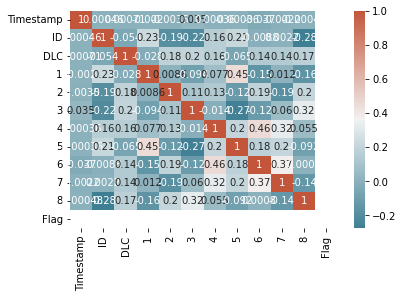

In [28]:
corr = dataset1[2].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

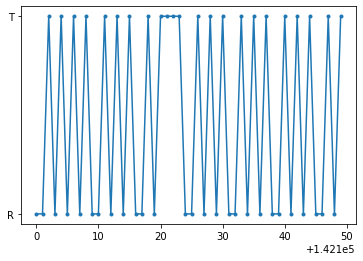

In [29]:
plt.plot(dataset3[0][142100:142150]['Flag'], marker='.')
plt.show()

In [ ]:
df = dataset2[2]

In [ ]:
print(f'0s: {df[df["Flag"] == 0].shape}')
print(f'1s: {df[df["Flag"] == 1].shape}')

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :3], df.iloc[:, -1], test_size=0.3, random_state=42)
split_index = int(0.7 * len(df))
X_train = df.iloc[:split_index, :-1]
y_train = df.iloc[:split_index, -1]
X_test = df.iloc[split_index:, :-1]
y_test = df.iloc[split_index:, -1]

In [ ]:
reg = LogisticRegression(class_weight="balanced").fit(X_train, y_train)
print(f"Regularized score on train: {reg.score(X_train, y_train)}")

Regularized score on train: 0.1698331843074993


In [ ]:
print(f"Regularized score on test: {reg.score(X_test, y_test)}")

Regularized score on test: 0.05179291237509781


In [ ]:
y_hat = reg.predict(X_test)
pprint(y_hat)
pprint(set(y_hat))

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)
{1}


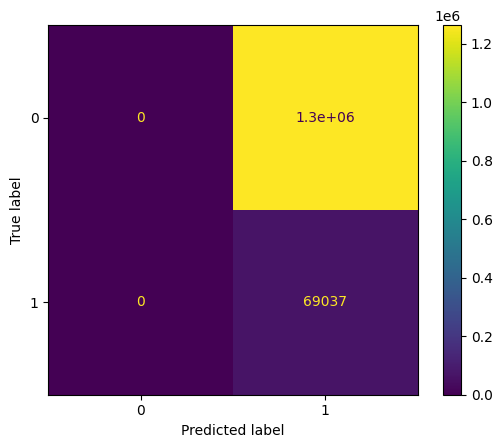

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_hat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
print(f"Accuracy: {metrics.accuracy_score(y_test, y_hat)}")
print(f"Precision: {metrics.precision_score(y_test, y_hat)}")
print(f"Recall: {metrics.recall_score(y_test, y_hat)}")
print(f"Sensitivity: {metrics.recall_score(y_test, y_hat, pos_label=0)}")
print(f"F1: {metrics.f1_score(y_test, y_hat)}")

Accuracy: 0.05179291237509781
Precision: 0.05179291237509781
Recall: 1.0
Sensitivity: 0.0
F1: 0.09848499978601692


In [ ]:
k = 20
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
print(f"Regularized score on train: {knn.score(X_train, y_train)}")

Regularized score on train: 1.0


In [ ]:
print(f"Regularized score on test: {knn.score(X_test, y_test)}")

Regularized score on test: 1.0


In [ ]:
y_hat = knn.predict(X_test)
pprint(y_hat)
pprint(set(y_hat))

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)
{0, 1}


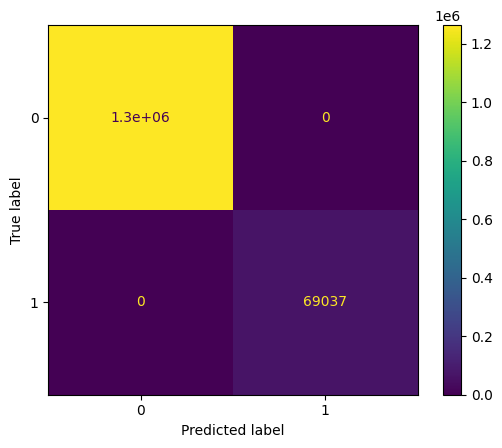

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_hat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
print(f"Accuracy: {metrics.accuracy_score(y_test, y_hat)}")
print(f"Precision: {metrics.precision_score(y_test, y_hat)}")
print(f"Recall: {metrics.recall_score(y_test, y_hat)}")
print(f"Sensitivity: {metrics.recall_score(y_test, y_hat, pos_label=0)}")
print(f"F1: {metrics.f1_score(y_test, y_hat)}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Sensitivity: 1.0
F1: 1.0


In [ ]:
svm = SVC(class_weight="balanced", C=0.0001, gamma=100)
svm.fit(X_train, y_train)
print(f"SVM score on train: {svm.score(X_train, y_train)}")

In [ ]:
print(f"SVM score on test: {svm.score(X_test, y_test)}")

In [ ]:
y_hat = svm.predict(X_test)
pprint(y_hat)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_hat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print(f"Accuracy: {metrics.accuracy_score(y_test, y_hat)}")
print(f"Precision: {metrics.precision_score(y_test, y_hat)}")
print(f"Recall: {metrics.recall_score(y_test, y_hat)}")
print(f"Sensitivity: {metrics.recall_score(y_test, y_hat, pos_label=0)}")
print(f"F1: {metrics.f1_score(y_test, y_hat)}")